In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as optimize
from pymoo.core.problem import Problem
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.optimize import minimize
import scipy.interpolate

# Question 1

In [2]:
file = 'data.xlsx'
data = pd.read_excel(file)
data = data.to_numpy()
data

array([[0.        , 1.        , 0.        , 0.        ],
       [0.05      , 0.74080857, 0.08639714, 0.17279428],
       [0.1       , 0.54877057, 0.15040981, 0.30081962],
       [0.15      , 0.40657779, 0.1978074 , 0.39561481],
       [0.2       , 0.30118162, 0.23293946, 0.46587892],
       [0.25      , 0.22314199, 0.25895267, 0.51790534],
       [0.3       , 0.16529744, 0.27823419, 0.55646837],
       [0.35      , 0.12246697, 0.29251101, 0.58502202],
       [0.4       , 0.09072015, 0.30309328, 0.60618656],
       [0.45      , 0.06721352, 0.31092883, 0.62185766],
       [0.5       , 0.04978992, 0.31673669, 0.63347339],
       [0.55      , 0.03688878, 0.32103707, 0.64207415],
       [0.6       , 0.02732619, 0.3242246 , 0.64844921],
       [0.65      , 0.02024566, 0.32658478, 0.65316956],
       [0.7       , 0.01499743, 0.32833419, 0.65666838],
       [0.75      , 0.01111142, 0.32962953, 0.65925905],
       [0.8       , 0.00823103, 0.33058966, 0.66117931],
       [0.85      , 0.00609828,

In [3]:
C_A0 = 1.0 # Initial concenteration of A
def cost_function(k):
    C_A = C_A0*np.exp(-(k[0]+k[1])*data[:,0])
    C_B = k[0]/(k[0]+k[1])*(C_A0 - C_A)
    C_C = k[1]/(k[0]+k[1])*(C_A0 - C_A)
    return np.sum((C_A - data[:,1])**2 + (C_B - data[:,2])**2 + (C_C - data[:,3])**2)

In [5]:
# Initial guess
k0 = np.array([1.0,1.0])

# Optimize the cost function using fmin
res = optimize.fmin(cost_function, x0=k0, disp=False)

# Print the results
print('k1 =', res[0])
print('k2 =', res[1])

k1 = 2.0000388711744823
k2 = 4.000055429544492


# Question 2

a. Using deterministic optimization algorithm

In [10]:
def fun(x):
    """
    Himmelblau function
    """
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

cons = ({'type':'ineq', 'fun': lambda x: x[0]**2 + x[1]**2 - 25})
bounds = ((-5, 5), (-5, 5))

In [11]:
# Initial guess
x0 = np.array([-4.0, -4.0])

# Using SLSQP method for minimization
res = optimize.minimize(fun,x0,method = 'SLSQP', bounds = bounds, constraints= cons)

constraint = res.x[0]**2 + res.x[1]**2 - 25

# Print the results
print('X = %s'%(res.x))
print('f(X) =', res.fun)
if constraint >= 0:
    print('Constraint satisfied')
else:
    print('Constraint not satisfied')
# Ignore warnings if any

X = [-3.77929579 -3.28317059]
f(X) = 1.6327046749963097e-08
Constraint satisfied


b. Using Genetic algorithm

In [14]:
class GenAlgo(Problem):
    def __init__(self):
        n_var = 2
        xl = np.array([-5, -5], dtype=float)
        xu = np.array([5, 5], dtype=float)
        super().__init__(n_var=n_var,n_obj=1, n_ieq_constr=1, xl=xl, xu=xu, vtype=float)

    def _evaluate(self, x, out, *args, **kwargs):
        # Objective
        f = (x[:,0]**2 + x[:,1] - 11)**2 + (x[:,0] + x[:,1]**2 - 7)**2

        # Constraint
        g = 25 - x[:,0]**2 - x[:,1]**2

        out["F"] = [f]
        out["G"] = [g]

In [15]:
problem =GenAlgo()

algorithm = GA(
    pop_size=100,
    eliminate_duplicates=True)

res = minimize(problem,algorithm,seed=1,verbose=False)

constraint = res.X[0]**2 + res.X[1]**2 - 25

print("Best solution found: \nX = %s\nf(X) = %s" % (res.X, res.F))
if constraint >= 0:
    print('Constraint satisfied')
else:
    print('Constraint not satisfied')

Best solution found: 
X = [-3.77926066 -3.28317794]
f(X) = [1.34536829e-07]
Constraint satisfied


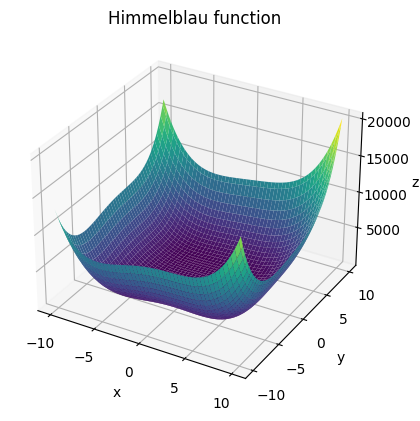

In [2]:
# 3D plot of Himmelblau function
a = np.linspace(-10, 10, 100)
b = np.linspace(-10, 10, 100)
a, b = np.meshgrid(a, b)
c = (a**2 + b - 11)**2 + (a + b**2 - 7)**2
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(a, b, c, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Himmelblau function')
plt.show()

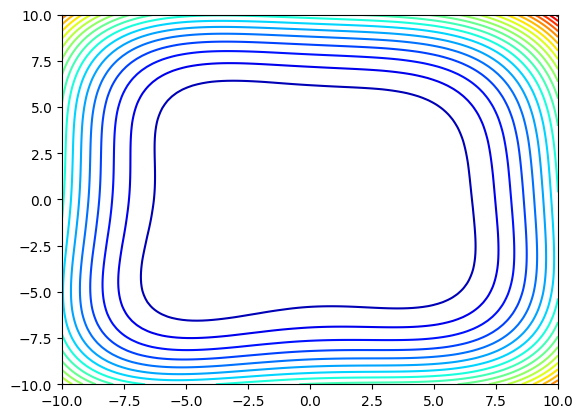

In [24]:
# contour plot of Himmelblau function
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)
z = (x**2 + y - 11)**2 + (x + y**2 - 7)**2
points = np.array([x.ravel(), y.ravel()]).T
values = z.ravel()
f = scipy.interpolate.LinearNDInterpolator(points, values)
xnew = np.linspace(-10, 10, 100)
ynew = np.linspace(-10, 10, 100)
xnew, ynew = np.meshgrid(xnew, ynew)
znew = f(xnew, ynew)
plt.contour(xnew, ynew, znew, 20, cmap='jet')
plt.show()